# Predict The Flight Ticket Price

###### Import data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [2]:
train=pd.read_excel("Data_Train.xlsx")
test=pd.read_excel("Test_set.xlsx")

In [3]:
train.shape,test.shape

((10683, 11), (2671, 10))

In [4]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train.dropna(inplace=True)

In [8]:
train.shape

(10682, 11)

In [9]:
for feature in train.columns:
    print("unique feature in {} are {}".format(feature,train[feature].nunique()))

unique feature in Airline are 12
unique feature in Date_of_Journey are 44
unique feature in Source are 5
unique feature in Destination are 6
unique feature in Route are 128
unique feature in Dep_Time are 222
unique feature in Arrival_Time are 1343
unique feature in Duration are 368
unique feature in Total_Stops are 5
unique feature in Additional_Info are 10
unique feature in Price are 1870


In [10]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

###### Data pre-processing

In [11]:
cat_columns=['Airline','Source', 'Destination', 'Total_Stops','Additional_Info']

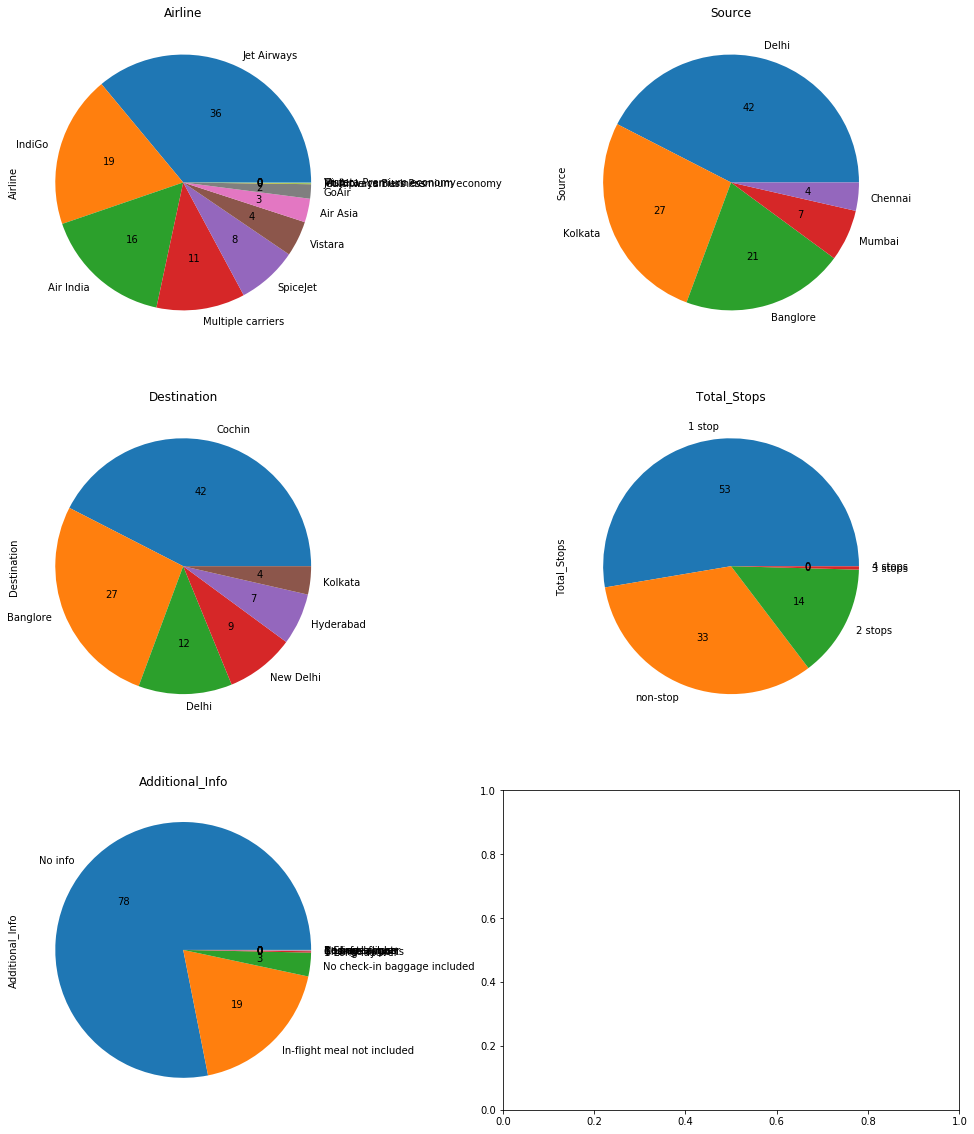

In [12]:
fig,axis=plt.subplots(3,2,figsize=(18,20))
axes=[ax for axis_row in axis for ax in axis_row]

for i,c in enumerate(cat_columns):
    train[c].value_counts().plot(kind="pie",autopct="%.0f",title=c,ax=axes[i])

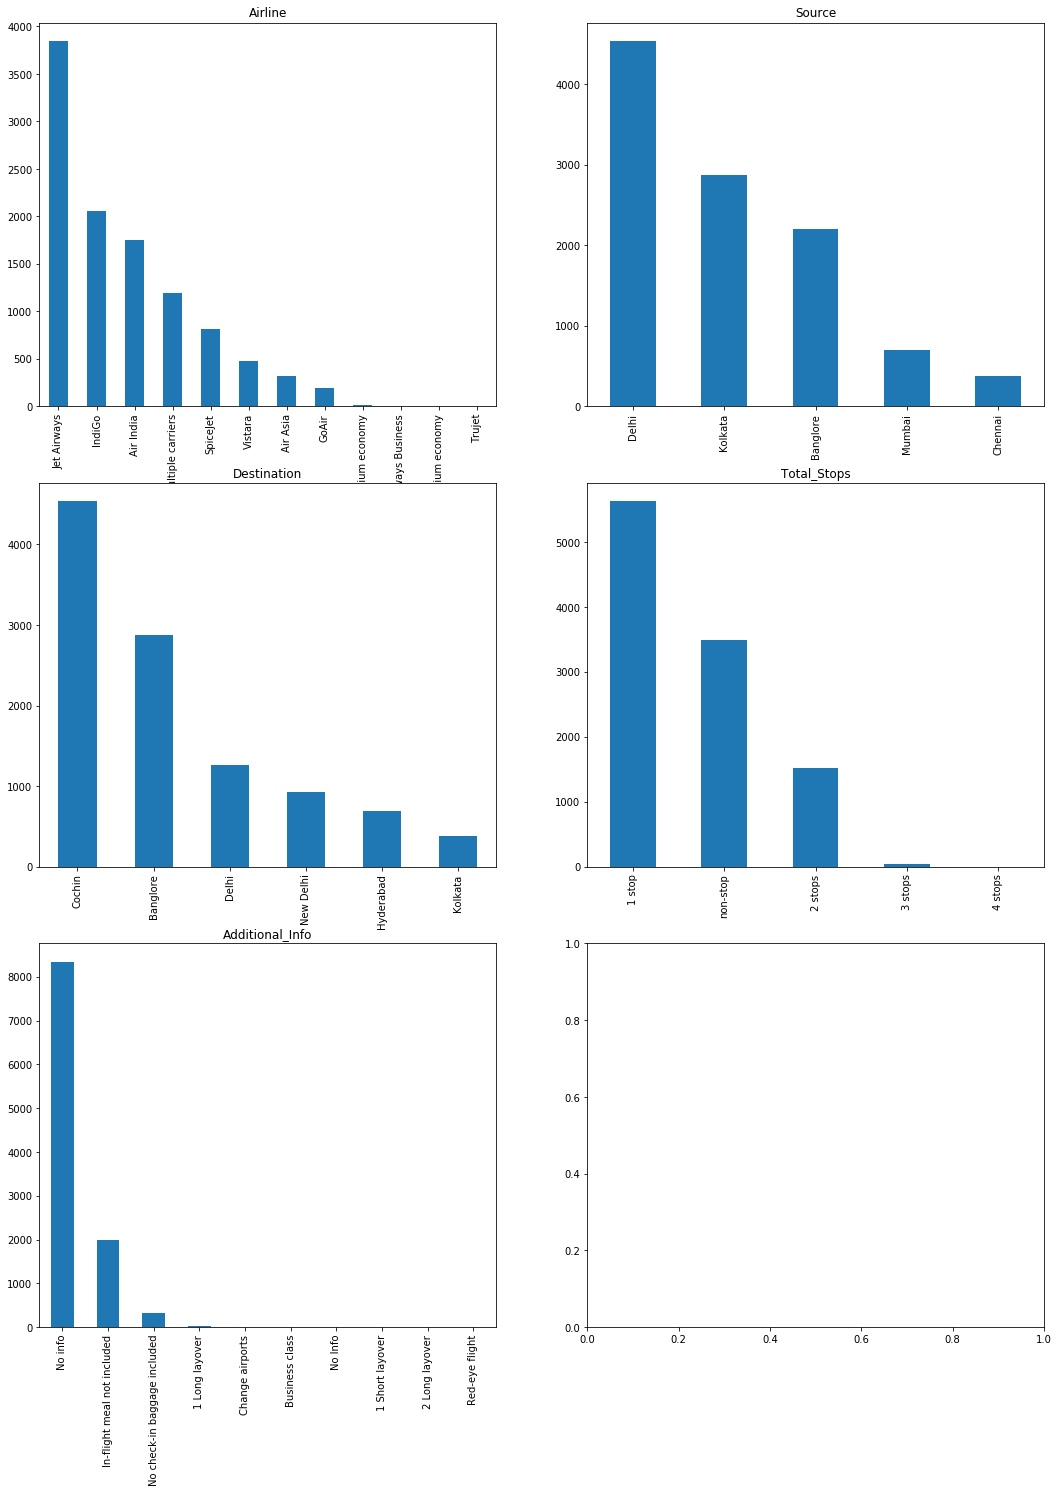

In [13]:
fig,axis=plt.subplots(3,2,figsize=(18,24))
axes=[ax for axis_row in axis for ax in axis_row]

for i,c in enumerate(cat_columns):
    train[c].value_counts().plot(kind="bar",title=c,ax=axes[i])

In [14]:
cat_columns=['Airline','Source', 'Destination', 'Total_Stops','Additional_Info']

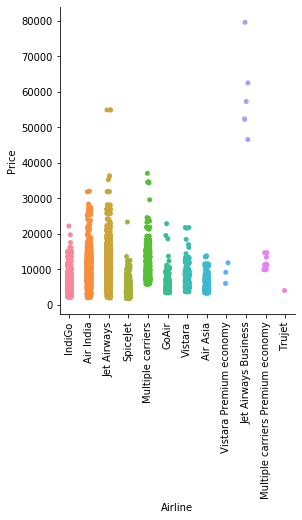

In [15]:
g=sns.catplot(data=train,x="Airline",y="Price")
g.set_xticklabels(rotation=90)

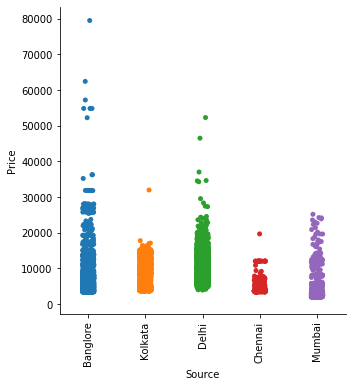

In [16]:
g=sns.catplot(data=train,x="Source",y="Price")
g.set_xticklabels(rotation=90)

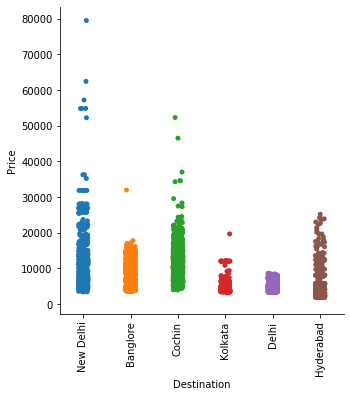

In [17]:
g=sns.catplot(data=train,x="Destination",y="Price")
g.set_xticklabels(rotation=90)

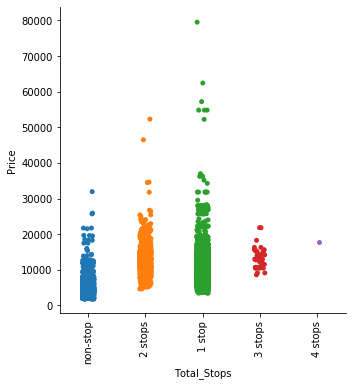

In [18]:
g=sns.catplot(data=train,x="Total_Stops",y="Price")
g.set_xticklabels(rotation=90)

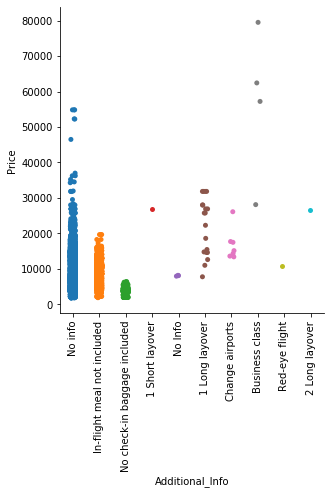

In [19]:
g=sns.catplot(data=train,x="Additional_Info",y="Price")
g.set_xticklabels(rotation=90)

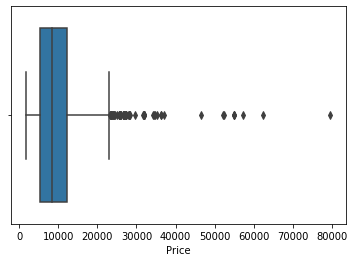

In [20]:
sns.boxplot(data=train,x="Price")

In [21]:
train.shape

(10682, 11)

In [22]:
train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

###### Creating a travel class feature to distinguish between economy,Business and premium economy

In [23]:
Class = {'IndiGo': 'Economy',
         'GoAir': 'Economy',
         'Vistara': 'Economy',
         'Vistara Premium economy': 'Premium Economy',
         'Air Asia': 'Economy',
         'Trujet': 'Economy',
         'Jet Airways': 'Economy',
         'SpiceJet': 'Economy',
         'Jet Airways Business': 'Business',
         'Air India': 'Economy',
         'Multiple carriers': 'Economy',
         'Multiple carriers Premium economy': 'Premium Economy'}
train['Travel_Class'] = train['Airline'].map(Class)
test['Travel_Class'] = test['Airline'].map(Class)

In [24]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Travel_Class
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Economy
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Economy
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Economy
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Economy
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Economy


###### Creating a market share column to map each airlines market share in india

In [25]:
market_share_dict = {'IndiGo': 43,
         'GoAir': 9,
         'Vistara': 4,
         'Vistara Premium economy': 2,
         'Air Asia': 5,
         'Trujet': 0.5,
         'Jet Airways': 12,
         'SpiceJet': 13,
         'Jet Airways Business': 8,
         'Air India': 11,
         'Multiple carriers': 2,
         'Multiple carriers Premium economy': 2}
train['Market Share'] = train['Airline'].map(market_share_dict)
test['Market Share'] = test['Airline'].map(market_share_dict)

###### Creating a airline ranking feature to rank the airline on the basis of ranking given to each airline in 2019

In [26]:
airline_ranking_dict={'IndiGo':1,
                      'Air India':2,
                      'Jet Airways':2,
                      'SpiceJet':3,
                      'GoAir':4,
                      'Vistara':5,
                      'Air Asia':6,
                      'Trujet':9,
                      'Vistara Premium economy':5,
                      'Multiple carriers Premium economy':6,
                      'Multiple carriers':8,
                      'Jet Airways Business':2}

train['Airline Ranking']=train['Airline'].map(airline_ranking_dict)
test['Airline Ranking']=test['Airline'].map(airline_ranking_dict)

###### Created a data copy to check that data is present only for year 2019 and for the month march to june

In [27]:
data=train.copy()
data["Date_of_Journey"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y")
data["Month"]=data["Date_of_Journey"].dt.month
data["Year"]=data["Date_of_Journey"].dt.year

In [28]:
data.describe()

,Price,Market Share,Airline Ranking,Month,Year
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0
mean,9087.214567,16.110419,2.852837,4.708575,2019.0
std,4611.548810,13.561833,2.133821,1.164408,0.0
min,1759.000000,0.500000,1.000000,3.000000,2019.0
25%,5277.000000,11.000000,2.000000,3.000000,2019.0
50%,8372.000000,12.000000,2.000000,5.000000,2019.0
75%,12373.000000,13.000000,3.000000,6.000000,2019.0
max,79512.000000,43.000000,9.000000,6.000000,2019.0


In [29]:
del data

######  Created No of days feature to check the number of days present from the day of booking which is considered as 1/3/2019

In [30]:
df1 = train.copy() 
df1['Day_of_Booking'] = '1/3/2019'
df1['Day_of_Booking'] = pd.to_datetime(df1['Day_of_Booking'],format='%d/%m/%Y')
df1['Date_of_Journey'] = pd.to_datetime(df1['Date_of_Journey'],format='%d/%m/%Y')
df1['Days_to_Departure'] = (df1['Date_of_Journey'] - df1['Day_of_Booking']).dt.days
train['No_of_Days'] = df1['Days_to_Departure']

df2 = test.copy() 
df2['Day_of_Booking'] = '1/3/2019'
df2['Day_of_Booking'] = pd.to_datetime(df2['Day_of_Booking'],format='%d/%m/%Y')
df2['Date_of_Journey'] = pd.to_datetime(df2['Date_of_Journey'],format='%d/%m/%Y')
df2['Days_to_Departure'] = (df2['Date_of_Journey'] - df2['Day_of_Booking']).dt.days
test['No_of_Days'] = df2['Days_to_Departure']

del df1, df2


In [31]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Travel_Class,Market Share,Airline Ranking,No_of_Days
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Economy,43.0,1,23
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Economy,11.0,2,61
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Economy,12.0,2,100
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Economy,43.0,1,72
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Economy,43.0,1,0


In [32]:
train.drop(columns=["Date_of_Journey"],inplace=True)
test.drop(columns=["Date_of_Journey"],inplace=True)

In [33]:
train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [34]:
train["Total_Stops"]=train["Total_Stops"].replace("non-stop","0 stops")
test["Total_Stops"]=test["Total_Stops"].replace("non-stop","0 stops")

In [35]:
train["Total_Stops"]=train["Total_Stops"].str.split(" ").str[0]
test["Total_Stops"]=test["Total_Stops"].str.split(" ").str[0]

In [36]:
train["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [37]:
df=train.append(test,ignore_index=True)

In [38]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Travel_Class,Market Share,Airline Ranking,No_of_Days
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,Economy,43.0,1,23
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,Economy,11.0,2,61
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,Economy,12.0,2,100
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,Economy,43.0,1,72
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,Economy,43.0,1,0


In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

label_encoder=["Airline","Source","Destination","Additional_Info","Travel_Class"]

for features in label_encoder:
    df[features]=le.fit_transform(df[features])

In [40]:
df["Dep_Hour"]=df["Dep_Time"].str.split(":").str[0]
df["Dep_Minute"]=df["Dep_Time"].str.split(":").str[1]

df["Arrival_Hour"]=df["Arrival_Time"].str.split(":").str[0]
df["Arrival_Minute"]=df["Arrival_Time"].str.split(":").str[1].str.split(" ").str[0]

In [41]:
df.drop(columns=["Dep_Time","Arrival_Time"],inplace=True)

In [42]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [43]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [44]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Travel_Class,Market Share,Airline Ranking,No_of_Days,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,3,0,5,BLR → DEL,2h 50m,0,8,3897.0,1,43.0,1,23,22,20,01,10,2,50
1,1,3,0,CCU → IXR → BBI → BLR,7h 25m,2,8,7662.0,1,11.0,2,61,05,50,13,15,7,25
2,4,2,1,DEL → LKO → BOM → COK,19h,2,8,13882.0,1,12.0,2,100,09,25,04,25,19,0
3,3,3,0,CCU → NAG → BLR,5h 25m,1,8,6218.0,1,43.0,1,72,18,05,23,30,5,25
4,3,0,5,BLR → NAG → DEL,4h 45m,1,8,13302.0,1,43.0,1,0,16,50,21,35,4,45


In [45]:
df.drop(columns=['Duration'],inplace=True)

###### Used TF-IDF to get the route feature in a processed way

In [46]:
def clean_route(route):
    route = route.split(' → ')
    return ' '.join(route)

df['Route'] = df['Route'].apply(clean_route)

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 1), lowercase=False)
train_route = tf.fit_transform(df['Route'])

train_route = pd.DataFrame(data=train_route.toarray(), columns=tf.get_feature_names())

In [47]:
train_route.head()

,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DED,DEL,GAU,GOI,GWL,HBX,HYD,IDR,IMF,ISK,IXA,IXB,IXC,IXR,IXU,IXZ,JAI,JDH,JLR,KNU,LKO,MAA,NAG,NDC,PAT,PNQ,RPR,STV,TIR,TRV,UDR,VGA,VNS,VTZ
0,0.0,0.0,0.000000,0.0,0.0,0.783312,0.000000,0.000000,0.000000,0.0,0.621629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.622213,0.0,0.0,0.194834,0.000000,0.248865,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.71621,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.238528,0.000000,0.269397,0.0,0.198160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.911736,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.272045,0.000000,0.347487,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.897354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.282727,0.000000,0.000000,0.000000,0.0,0.224370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.932590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df = pd.concat([df, train_route], axis=1) 
df.drop('Route', axis=1, inplace=True)


In [49]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Travel_Class,Market Share,Airline Ranking,No_of_Days,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DED,DEL,GAU,GOI,GWL,HBX,HYD,IDR,IMF,ISK,IXA,IXB,IXC,IXR,IXU,IXZ,JAI,JDH,JLR,KNU,LKO,MAA,NAG,NDC,PAT,PNQ,RPR,STV,TIR,TRV,UDR,VGA,VNS,VTZ
0,3,0,5,0,8,3897.0,1,43.0,1,23,22,20,01,10,2,50,0.0,0.0,0.000000,0.0,0.0,0.783312,0.000000,0.000000,0.000000,0.0,0.621629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,0,2,8,7662.0,1,11.0,2,61,05,50,13,15,7,25,0.0,0.0,0.622213,0.0,0.0,0.194834,0.000000,0.248865,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.71621,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2,1,2,8,13882.0,1,12.0,2,100,09,25,04,25,19,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.238528,0.000000,0.269397,0.0,0.198160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.911736,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,0,1,8,6218.0,1,43.0,1,72,18,05,23,30,5,25,0.0,0.0,0.000000,0.0,0.0,0.272045,0.000000,0.347487,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.897354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0,5,1,8,13302.0,1,43.0,1,0,16,50,21,35,4,45,0.0,0.0,0.000000,0.0,0.0,0.282727,0.000000,0.000000,0.000000,0.0,0.224370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.932590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
train_df=df[df["Price"].isnull()!=True]
test_df=df[df["Price"].isnull()==True]
test_df.drop(columns=["Price"],inplace=True)

In [51]:
X=train_df.drop(labels=["Price"],axis=1)
y=train_df["Price"].values

In [52]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Travel_Class,Market Share,Airline Ranking,No_of_Days,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DED,DEL,GAU,GOI,GWL,HBX,HYD,IDR,IMF,ISK,IXA,IXB,IXC,IXR,IXU,IXZ,JAI,JDH,JLR,KNU,LKO,MAA,NAG,NDC,PAT,PNQ,RPR,STV,TIR,TRV,UDR,VGA,VNS,VTZ
0,3,0,5,0,8,1,43.0,1,23,22,20,01,10,2,50,0.0,0.0,0.000000,0.0,0.0,0.783312,0.000000,0.000000,0.000000,0.0,0.621629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,0,2,8,1,11.0,2,61,05,50,13,15,7,25,0.0,0.0,0.622213,0.0,0.0,0.194834,0.000000,0.248865,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.71621,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2,1,2,8,1,12.0,2,100,09,25,04,25,19,0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.238528,0.000000,0.269397,0.0,0.198160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.911736,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,0,1,8,1,43.0,1,72,18,05,23,30,5,25,0.0,0.0,0.000000,0.0,0.0,0.272045,0.000000,0.347487,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.897354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0,5,1,8,1,43.0,1,0,16,50,21,35,4,45,0.0,0.0,0.000000,0.0,0.0,0.282727,0.000000,0.000000,0.000000,0.0,0.224370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.932590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_scaler=scaler.fit_transform(X)
test_df_scaler=scaler.transform(test_df)

X=pd.DataFrame(data=X_scaler,columns=X.columns)
test_df=pd.DataFrame(data=test_df_scaler,columns=test_df.columns)


In [54]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Travel_Class,Market Share,Airline Ranking,No_of_Days,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DED,DEL,GAU,GOI,GWL,HBX,HYD,IDR,IMF,ISK,IXA,IXB,IXC,IXR,IXU,IXZ,JAI,JDH,JLR,KNU,LKO,MAA,NAG,NDC,PAT,PNQ,RPR,STV,TIR,TRV,UDR,VGA,VNS,VTZ
0,-0.410805,-1.658359,2.416534,-1.220666,0.499921,-0.020633,1.982832,-0.868359,-1.151454,1.654154,-0.234950,-1.800436,-0.890014,-0.970614,1.279041,-0.169319,-0.061308,-0.110148,-0.05974,-0.080543,1.535534,-1.000618,-0.647563,-0.814952,-0.016758,1.307017,-0.096303,-0.090873,-0.030611,-0.028963,-0.364048,-0.106399,-0.02164,-0.019355,-0.009676,-0.044382,-0.036226,-0.071081,-0.033536,-0.009676,-0.158204,-0.066444,-0.009676,-0.030611,-0.075777,-0.269147,-0.101496,-0.009676,-0.030611,-0.084384,-0.042148,-0.013685,0.0,-0.047438,-0.045426,-0.0528,-0.032105,-0.019246
1,-1.261152,0.890014,-0.973812,1.741432,0.499921,-0.020633,-0.376841,-0.399694,-0.105452,-1.303113,1.363607,-0.050909,-0.587094,-0.381999,-0.196319,-0.169319,-0.061308,6.533034,-0.05974,-0.080543,-0.316159,-1.000618,0.170675,-0.814952,-0.016758,-1.346847,-0.096303,-0.090873,-0.030611,-0.028963,-0.364048,-0.106399,-0.02164,-0.019355,-0.009676,-0.044382,-0.036226,11.499339,-0.033536,-0.009676,-0.158204,-0.066444,-0.009676,-0.030611,-0.075777,-0.269147,-0.101496,-0.009676,-0.030611,-0.084384,-0.042148,-0.013685,0.0,-0.047438,-0.045426,-0.0528,-0.032105,-0.019246
2,0.014369,0.040556,-0.295743,1.741432,0.499921,-0.020633,-0.303101,-0.399694,0.968077,-0.607286,0.031476,-1.363054,0.018745,1.030677,-1.671678,-0.169319,-0.061308,-0.110148,-0.05974,-0.080543,-0.929222,-0.082356,-0.647563,0.108725,-0.016758,-0.500860,-0.096303,-0.090873,-0.030611,-0.028963,-0.364048,-0.106399,-0.02164,-0.019355,-0.009676,-0.044382,-0.036226,-0.071081,-0.033536,-0.009676,-0.158204,-0.066444,-0.009676,-0.030611,13.062241,-0.269147,-0.101496,-0.009676,-0.030611,-0.084384,-0.042148,-0.013685,0.0,-0.047438,-0.045426,-0.0528,-0.032105,-0.019246
3,-0.410805,0.890014,-0.973812,0.260383,0.499921,-0.020633,1.982832,-0.868359,0.197338,0.958326,-1.034229,1.407030,0.321664,-0.617445,-0.196319,-0.169319,-0.061308,-0.110148,-0.05974,-0.080543,-0.073209,-1.000618,0.494934,-0.814952,-0.016758,-1.346847,-0.096303,-0.090873,-0.030611,-0.028963,-0.364048,-0.106399,-0.02164,-0.019355,-0.009676,-0.044382,-0.036226,-0.071081,-0.033536,-0.009676,-0.158204,-0.066444,-0.009676,-0.030611,-0.075777,-0.269147,10.263900,-0.009676,-0.030611,-0.084384,-0.042148,-0.013685,0.0,-0.047438,-0.045426,-0.0528,-0.032105,-0.019246
4,-0.410805,-1.658359,2.416534,0.260383,0.499921,-0.020633,1.982832,-0.868359,-1.784560,0.610412,1.363607,1.115442,0.624584,-0.735168,0.983969,-0.169319,-0.061308,-0.110148,-0.05974,-0.080543,-0.039597,-1.000618,-0.647563,-0.814952,-0.016758,-0.388965,-0.096303,-0.090873,-0.030611,-0.028963,-0.364048,-0.106399,-0.02164,-0.019355,-0.009676,-0.044382,-0.036226,-0.071081,-0.033536,-0.009676,-0.158204,-0.066444,-0.009676,-0.030611,-0.075777,-0.269147,10.670909,-0.009676,-0.030611,-0.084384,-0.042148,-0.013685,0.0,-0.047438,-0.045426,-0.0528,-0.032105,-0.019246


In [55]:
y=np.log1p(y)

In [56]:
for features in X.columns:
    X[features]=X[features].round(decimals=2)
    
for features in test_df.columns:
    test_df[features]=test_df[features].round(decimals=2)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from math import sqrt
import lightgbm as lgb
from xgboost import XGBRegressor

In [58]:
X_train , X_cv , y_train , y_cv = train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1500,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 8011, number of used features: 50
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 8.990942
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.135035
[200]	valid_0's rmse: 0.11873
[300]	valid_0's rmse: 0.113043
[400]	valid_0's rmse: 0.110083
[500]	valid_0's rmse: 0.108557
[600]	valid_0's rmse: 0.107169
[700]	valid_0's rmse: 0.106173
Early stopping, best iteration is:
[724]	valid_0's rmse: 0.105994
RMSLE: 0.1059944924683474


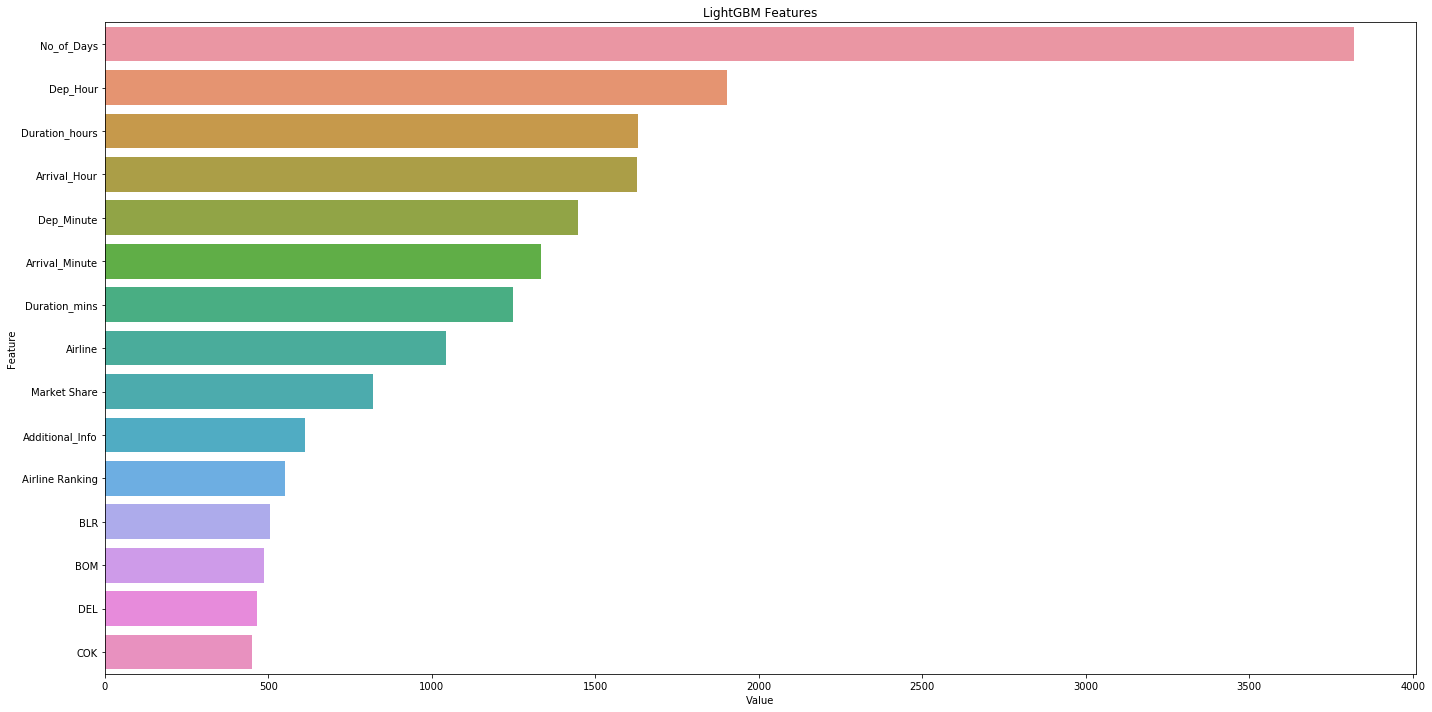

In [60]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:15], 
                           columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [61]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Travel_Class,Market Share,Airline Ranking,No_of_Days,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DED,DEL,GAU,GOI,GWL,HBX,HYD,IDR,IMF,ISK,IXA,IXB,IXC,IXR,IXU,IXZ,JAI,JDH,JLR,KNU,LKO,MAA,NAG,NDC,PAT,PNQ,RPR,STV,TIR,TRV,UDR,VGA,VNS,VTZ
752,-0.41,0.04,-0.30,0.26,0.50,-0.02,1.98,-0.87,0.61,0.61,-1.30,1.12,-1.50,-0.62,-1.67,-0.17,-0.06,-0.11,-0.06,-0.08,-0.93,1.23,-0.65,1.43,-0.02,0.71,-0.1,-0.09,-0.03,-0.03,-0.36,-0.11,-0.02,-0.02,-0.01,-0.04,-0.04,-0.07,-0.03,-0.01,-0.16,-0.07,-0.01,-0.03,-0.08,-0.27,-0.1,-0.01,-0.03,-0.08,-0.04,-0.01,0.0,-0.05,-0.05,-0.05,-0.03,-0.02
7430,-0.41,0.89,-0.97,-1.22,0.50,-0.02,1.98,-0.87,-1.65,0.44,-0.77,0.53,1.23,-0.97,0.39,-0.17,-0.06,-0.11,-0.06,-0.08,1.01,-1.00,1.94,-0.81,-0.02,-1.35,-0.1,-0.09,-0.03,-0.03,-0.36,-0.11,-0.02,-0.02,-0.01,-0.04,-0.04,-0.07,-0.03,-0.01,-0.16,-0.07,-0.01,-0.03,-0.08,-0.27,-0.1,-0.01,-0.03,-0.08,-0.04,-0.01,0.0,-0.05,-0.05,-0.05,-0.03,-0.02
5478,0.01,0.89,-0.97,0.26,0.50,-0.02,-0.30,-0.40,1.05,0.96,1.63,0.82,1.53,1.62,1.57,-0.17,-0.06,-0.11,-0.06,-0.08,0.74,0.95,1.58,-0.81,-0.02,-1.35,-0.1,-0.09,-0.03,-0.03,-0.36,-0.11,-0.02,-0.02,-0.01,-0.04,-0.04,-0.07,-0.03,-0.01,-0.16,-0.07,-0.01,-0.03,-0.08,-0.27,-0.1,-0.01,-0.03,-0.08,-0.04,-0.01,0.0,-0.05,-0.05,-0.05,-0.03,-0.02
3445,0.01,0.04,-0.30,0.26,0.50,-0.02,-0.30,-0.40,0.89,-0.26,0.30,-1.36,0.02,0.68,1.57,-0.17,-0.06,-0.11,-0.06,-0.08,-0.93,1.23,-0.65,1.43,-0.02,0.71,-0.1,-0.09,-0.03,-0.03,-0.36,-0.11,-0.02,-0.02,-0.01,-0.04,-0.04,-0.07,-0.03,-0.01,-0.16,-0.07,-0.01,-0.03,-0.08,-0.27,-0.1,-0.01,-0.03,-0.08,-0.04,-0.01,0.0,-0.05,-0.05,-0.05,-0.03,-0.02
9125,0.01,0.04,-0.30,0.26,-1.97,-0.02,-0.30,-0.40,0.11,1.31,1.63,-1.36,0.02,-0.38,0.10,-0.17,-0.06,-0.11,-0.06,-0.08,-0.93,1.23,-0.65,1.43,-0.02,0.71,-0.1,-0.09,-0.03,-0.03,-0.36,-0.11,-0.02,-0.02,-0.01,-0.04,-0.04,-0.07,-0.03,-0.01,-0.16,-0.07,-0.01,-0.03,-0.08,-0.27,-0.1,-0.01,-0.03,-0.08,-0.04,-0.01,0.0,-0.05,-0.05,-0.05,-0.03,-0.02


In [62]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

y_pred_rfr = reg_rf.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_rfr))))

RMSLE: 0.11524948243229478


###### Predicting on test data

In [63]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65
         }

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=50)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))
    p = lgbm.predict(test_df)
    
    y_pred_totlgb.append(p)

[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
RMSLE LGBM:  0.09471133219478
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_data_in_lea

RMSLE LGBM:  0.13087538211741484
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
RMSLE LGBM:  0.09320957517506495


In [64]:
np.mean(errlgb)

0.10462445838389743

In [65]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))

In [66]:
submission=pd.DataFrame()
submission["Price"]=lgbm_final

In [67]:
submission.to_csv("submission.csv",index=False)